# **Predicting Stress Level By Training a Multilayer Perceptron**

This machine learning project aims to predict the stress level being experienced by an individual given their sleep health and various lifestyle habits. The project uses a Multilayer Perceptron (MLP) as the machine learning algorithm. [Sleep Health Data](https://www.kaggle.com/datasets/imaginativecoder/sleep-health-data-sampledt) is the dataset used for the project, and is acquired from Kaggle. 

This is a course requirement for CS 180 (Artificial Intelligence) Course of the Department of Computer Science, College of Engineering, University of the Philippines, Diliman under the guidance of Carlo Raquel for A.Y. 2023-2024.

- MAXIMO, Calvin James T.
- MENDOZA, Janelle M.
- MURILLO, Joana Marie V.

The GitHub repository for this project can be accessed [here](https://github.com/cjmax34/cs180-project).

## 1. Importing libraries

First, we have to import the libraries needed for the project. The libraries imported here are for loading the dataset, and performing exploratory data analysis (EDA). Additional libraries for modeling, and metrics will be imported later in the notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Loading the dataset

Next, we will now load the dataset and store it in a variable named `dataset`.

In [2]:
dataset = pd.read_csv('Sleep_Data_Sampled.csv')

## 3. Performing Exploratory Data Analysis (EDA)

Now we will perform EDA on our dataset. This is important to help us understand the dataset more before we make assumptions. There might be patterns, trends, and relationships in the dataset that may not be visible at first glance. There might also be rows that contain missing values, outliers, inconsistencies, or biases, which could lead to inaccurate results. By gaining a deeper understanding of the dataset at hand through performing EDA, we are able to choose the appropriate techniques and approaches in training the model.

### Data exploration

#### Shape of dataset

We want to know the shape of the dataset, or the number of rows and columns it has. We can easily do this by calling `shape()` on `dataset`. 

In [3]:
# Prints (# of rows, # of columns)
dataset.shape

(15000, 13)

Our dataset has 15000 rows (!!) and 13 columns/features.

#### Getting information about the dataset

We want more information about the dataset. We can do this by calling `info()` on `dataset`. This provides us essential information such as the number of columns, column names, and data types of each column.

In [4]:
# Provides information about the dataset
dataset.info(); 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                15000 non-null  int64  
 1   Gender                   15000 non-null  object 
 2   Age                      15000 non-null  int64  
 3   Occupation               15000 non-null  object 
 4   Sleep Duration           15000 non-null  float64
 5   Quality of Sleep         15000 non-null  int64  
 6   Physical Activity Level  15000 non-null  int64  
 7   Stress Level             15000 non-null  int64  
 8   BMI Category             15000 non-null  object 
 9   Blood Pressure           15000 non-null  object 
 10  Heart Rate               15000 non-null  int64  
 11  Daily Steps              15000 non-null  int64  
 12  Sleep Disorder           15000 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usage: 1.5+ MB


In [5]:
# Print column names of dataset
dataset.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

We can see that there are 13 columns in total, namely: Person ID, Gender, Age, Occupation, Sleep Duration, Quality of Sleep, Physical Activity Level, Stress Level, BMI Category, Blood Pressure, Heart Rate, Daily Steps, and Sleep Disorder. 

The data types across all columns are float, int, and object (string).

#### Setting stress level as the last column

To streamline the process of getting the training and testing data later, we will set the `Stress Level` feature as the last column of `dataset`. 

In [6]:
dataset = dataset[['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder', 'Stress Level']]
dataset.columns # Verify that stress level is the last column

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'BMI Category',
       'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder',
       'Stress Level'],
      dtype='object')

#### Unique values per column

In this part, we want to identify the unique values for each of the dataset's columns/features. This helps us ensure the consistent formatting of the values across all columms and assess the complexity of each categorical feature (number of unique values).

In [7]:
# Number of unique values per column
dataset.nunique()

Person ID                  15000
Gender                         2
Age                           33
Occupation                    11
Sleep Duration                55
Quality of Sleep               6
Physical Activity Level       37
BMI Category                   4
Blood Pressure                25
Heart Rate                    22
Daily Steps                   80
Sleep Disorder                 3
Stress Level                   6
dtype: int64

The number of unique Person IDs is 15000, which makes sense because it is used to identify an individual in the dataset. We will deal with this later.

In [8]:
# Unique values per categorical feature
for col in dataset.select_dtypes(include='object').columns:
    print(f"{col}: {list(dataset[col].unique())}")

Gender: ['Male', 'Female']
Occupation: ['Doctor', 'Teacher', 'Software Engineer', 'Lawyer', 'Engineer', 'Accountant', 'Nurse', 'Scientist', 'Manager', 'Salesperson', 'Sales Representative']
BMI Category: ['Normal Weight', 'Normal', 'Overweight', 'Obese']
Blood Pressure: ['120/80', '135/90', '126/83', '125/80', '130/85', '140/95', '115/75', '122/80', '118/76', '128/85', '128/84', '119/77', '125/82', '118/75', '115/78', '121/79', '117/76', '140/90', '135/88', '129/84', '130/86', '139/91', '132/87', '131/86', '142/92']
Sleep Disorder: ['Healthy', 'Sleep Apnea', 'Insomnia']


From the output above, it seems that the formatting of each column/feature's values is consistent. However, we have to preprocess some of the values, such as "Male" and "Female" in the Gender category, "Normal Weight" in the BMI Category feature, and the systolic and diastolic blood pressure measurements in the Blood Pressure category. We will delve into this later on.

##### Renaming of column values

As seen from the output of the previous code block, the unique values of the `BMI Category` feature are `Normal Weight`, `Normal`, `Overweight`, and `Obese`. We want to change `Normal Weight` to `Normal` since they are equivalent.

In [9]:
# Rename Normal Weight to Normal
dataset['BMI Category'] = dataset['BMI Category'].str.replace('Normal Weight', 'Normal')
dataset['BMI Category'].unique()    # Verify that there are only three unique values  

array(['Normal', 'Overweight', 'Obese'], dtype=object)

In [10]:
dataset.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Stress Level
0,1,Male,35,Doctor,6.65,7,50,Normal,120/80,71,7100,Healthy,7
1,2,Male,42,Teacher,6.90,8,52,Normal,135/90,66,7000,Healthy,4
2,3,Male,34,Software Engineer,6.95,7,66,Overweight,126/83,74,6100,Healthy,6
3,4,Male,32,Doctor,6.90,6,52,Normal,120/80,71,6500,Healthy,7
4,5,Male,37,Lawyer,6.85,7,60,Normal,125/80,71,6500,Healthy,6


We have successfully renamed all `Normal Weight` entries to `Normal`.

#### Statistical summary

The `describe()` method returns a statistical summary of the numerical features in the given dataset. For each column, it returns these information.

count - The number of not-empty values.\
mean - The average (mean) value.\
std - The standard deviation.\
min - the minimum value.\
25% - The 25% percentile.\
50% - The 50% percentile.\
75% - The 75% percentile.\
max - the maximum value.

Reference: https://www.w3schools.com/python/pandas/ref_df_describe.asp

In [11]:
dataset.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Heart Rate,Daily Steps,Stress Level
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7500.500000,44.130667,6.997327,7.131267,59.925000,70.857533,6795.080000,5.654800
std,4330.271354,6.840091,0.615187,1.053111,16.814374,3.614836,1329.706484,1.393568
min,1.000000,27.000000,5.800000,4.000000,30.000000,65.000000,3000.000000,3.000000
25%,3750.750000,40.000000,6.500000,6.000000,45.000000,68.000000,6000.000000,4.000000
50%,7500.500000,44.000000,7.000000,7.000000,60.000000,70.000000,6500.000000,6.000000
75%,11250.250000,48.000000,7.450000,8.000000,75.000000,72.000000,7600.000000,6.000000
max,15000.000000,59.000000,8.500000,9.000000,90.000000,86.000000,10000.000000,8.000000


We can see from the table above that all numerical features have the same count (15000).

The average age is 44.13 years. The average sleep duration is 7 hours. The average quality of sleep (1-10, 1 being the lowest and 10 being the highest) is 7.13. The average amount of daily physical activity is 59.93 minutes, or nearly an hour. The average stress level (1-10, 1 being the lowest and 10 being the highest) is 5.65. The average heart rate is 70.86 beats per minute. The average number of daily steps is 6795.

#### Checking for the presence of null values

An important part of data exploration is checking for the presence of null values in the dataset. It is vital to handle null values because they can produce inaccurate or misleading results. Some machine learning algorithms, especially MLP, also cannot handle null values. Ultimately, it helps us in deciding the best way to handle the null values through various methods such as imputation and removal of rows.

In [12]:
# Checking for null values
dataset.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
Stress Level               0
dtype: int64

Fortunately, there are no null values across **ALL** rows of the dataset.

### Data visualization

Data visualization is another important part of every machine learning project. In this part, we will be using graphs to better understand the patterns and trends in the data. These patterns and trends can easily be understood through visualization especially if they are hard to discern from the raw data. It condenses quite complex information into an easily digestible format. We can also discover what features correlate strongly with the target variable (stress level). Ultimately, it is a powerful tool for effectively communicating insights on data to a wider audience.

#### Distribution of stress level

We want to visualize the distribution of the stress level feature, which is our target variable, in our dataset. The code block below is from [Tanaya Tipre's project](https://www.kaggle.com/code/tanayatipre/stress-level-detection#5.-Data-Visualization), with the labels modified for clarity.

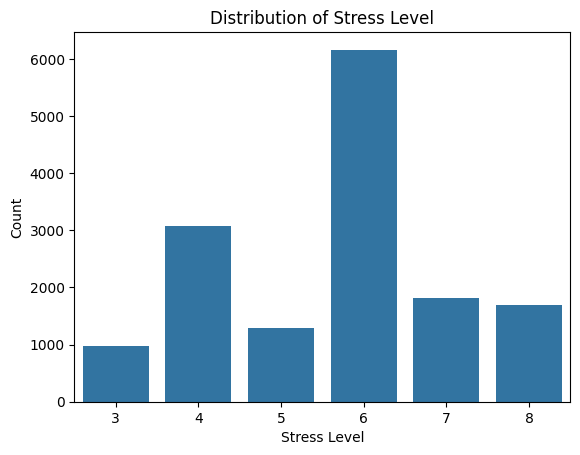

In [13]:
# Distribution of stress level
sns.countplot(x='Stress Level', data=dataset)

plt.xlabel('Stress Level')

plt.ylabel('Count')

plt.title('Distribution of Stress Level')

# Displaying the plot
plt.show()

From the figure above, we can observe that the stress level is not distributed evenly, and a stress level of 6 is found across many records in the dataset.

#### Distribution of numerical features

We want to visualize the distribution of the numerical features of the dataset. We might be able to identify outliers and potential patterns across these features.

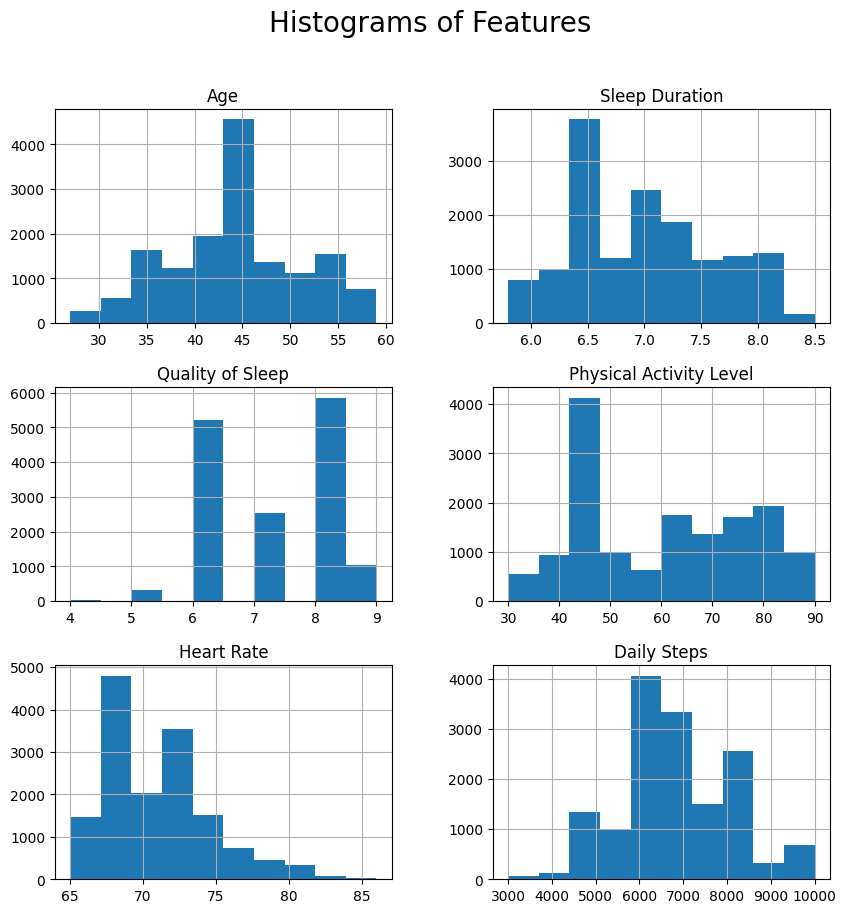

In [14]:
# List of features to plot histograms for
features = [col for col in dataset.columns if col not in ['Stress Level', 'Person ID']]

# Plot histograms for each feature
dataset.hist(column=features, bins=10, figsize=(10, 10))
plt.suptitle("Histograms of Features", fontsize=20)
plt.show()

#### Distribution of categorical features

Visualizing the distribution of stress levels by Gender, BMI Category, and Sleep Disorder allows for a visual examination of trends and relationships in the data.


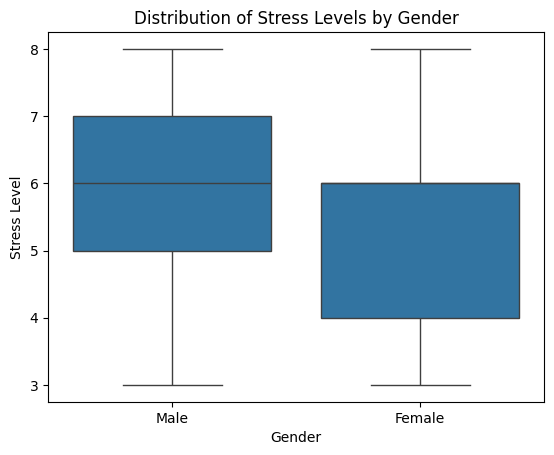

In [15]:
sns.boxplot(x='Gender', y='Stress Level', data=dataset)
plt.title('Distribution of Stress Levels by Gender')
plt.show()

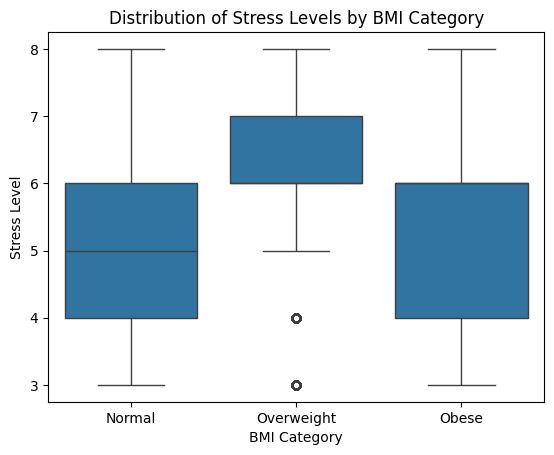

In [16]:
sns.boxplot(x='BMI Category', y='Stress Level', data=dataset)
plt.title('Distribution of Stress Levels by BMI Category')
plt.show()

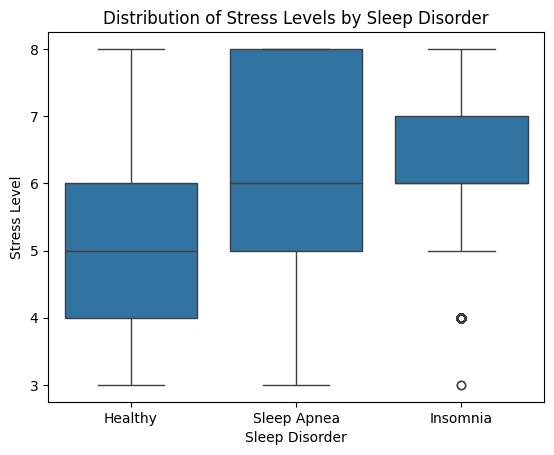

In [17]:
sns.boxplot(x='Sleep Disorder', y='Stress Level', data=dataset)
plt.title('Distribution of Stress Levels by Sleep Disorder')
plt.show()

#### Solving and visualizing the correlation matrix

We want to identify relationships among the variables and select features that are highly correlated. This helps in avoiding redundancy and building more accurate models.


In [18]:
numerical_features = dataset.select_dtypes(include=['number'])
numerical_features.drop('Person ID', axis=1, inplace=True)

# Calculate the correlation matrix
correlation_matrix = numerical_features.corr()

# Print the correlation matrix
print(correlation_matrix)

                              Age  Sleep Duration  Quality of Sleep  \
Age                      1.000000        0.242359          0.382186   
Sleep Duration           0.242359        1.000000          0.871070   
Quality of Sleep         0.382186        0.871070          1.000000   
Physical Activity Level  0.405467        0.258421          0.381601   
Heart Rate              -0.031232       -0.411150         -0.451876   
Daily Steps              0.258497       -0.003157          0.188875   
Stress Level            -0.236076       -0.819078         -0.785485   

                         Physical Activity Level  Heart Rate  Daily Steps  \
Age                                     0.405467   -0.031232     0.258497   
Sleep Duration                          0.258421   -0.411150    -0.003157   
Quality of Sleep                        0.381601   -0.451876     0.188875   
Physical Activity Level                 1.000000    0.247722     0.802275   
Heart Rate                              0.2477

<function matplotlib.pyplot.show(close=None, block=None)>

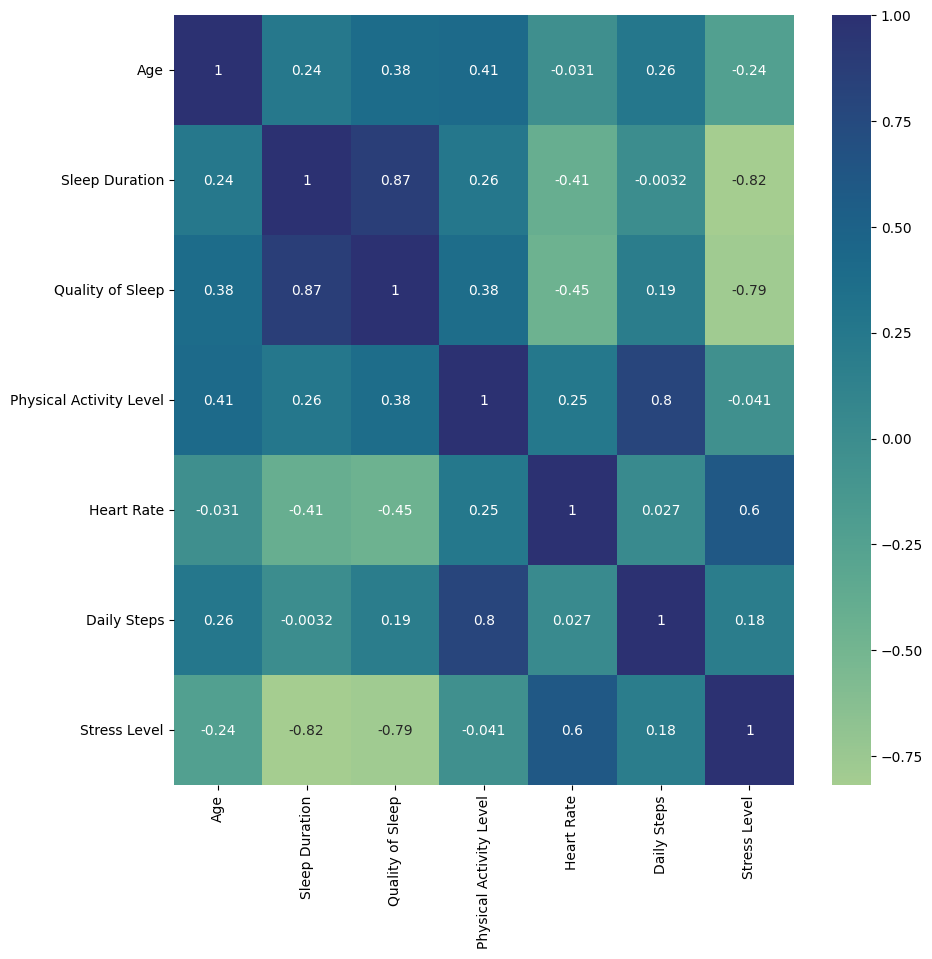

In [19]:
plt.figure(figsize = (10, 10))
sns.heatmap(correlation_matrix, cmap = 'crest', annot = True)
plt.show

##### Positively correlated columns
"Sleep Duration" and "Quality of Sleep"\
"Physical Activity Level" and "Daily Steps"\
"Stress Level" and Heart Rate"

##### Negatively correlated columns:
"Stress Level" and "Sleep Duration"\
"Stress Level" and "Quality of Sleep"

##### No correlation with target column (stress level)
"Physical Activity Level"

## 4. Data preprocessing

Now that we have uncovered the possible trends and patterns in the dataset, we will now perform preprocessing. This involves renaming of columns or column values (if applicable), dropping of unused features, normalization of numerical features, label encoding (converting categorical data to numerical data), and dealing with null values.

### Importing libraries for preprocessing

In [20]:
# Importing the necessary libraries to conduct preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

label_encoder = LabelEncoder()  # Instantiate the label encoder

There are categorical features in the dataset such as `Gender`, `Occupation`, `BMI Category`, `Sleep Disorder`, and also the target variable `Stress Level`. Label encoding is utilized here to convert categorical values into numerical values by assigning a unique numerical label for each categorical value. This is done by importing `LabelEncoder`.

On the other hand, standardizing numerical features such as `Age`, `Sleep Duration`, `Physical Activity Level`, `Blood Pressure`, `Heart Rate`, and `Daily Steps` is essential. This process ensures that variables with different units and scales contribute equally to the model, preventing biases and allowing machine learning algorithms to effectively learn patterns, leading to improved model performance.

Reference: https://www.kaggle.com/code/alnourabdalrahman9/sleeping-disorders-detection-outliers-removal#Splitting-the-Data:

### Splitting blood pressure

The `Blood Pressure` feature in our dataset is currently in the format of systolic pressure/diastolic pressure. We want to split them up such that there are separate columns for the systolic pressure and diastolic pressure to avoid inconsistencies when training the MLP.

Systolic pressure is the maximum blood pressure during contraction of the ventricles; diastolic pressure is the minimum pressure recorded just prior to the next contraction.

Reference: https://www.ncbi.nlm.nih.gov/books/NBK268/

In [21]:
# Split the blood pressure feature into systolic blood pressure and diastolic blood pressure
dataset[['Systolic Blood Pressure', 'Diastolic Blood Pressure']] = dataset['Blood Pressure'].str.split('/', n=1, expand=True)

# Convert the data type of the newly created columns to numeric
dataset[['Systolic Blood Pressure', 'Diastolic Blood Pressure']] = dataset[['Systolic Blood Pressure', 'Diastolic Blood Pressure']].apply(pd.to_numeric)

dataset.drop('Blood Pressure', axis=1, inplace=True) # Drop the original blood pressure column
print(dataset[['Systolic Blood Pressure', 'Diastolic Blood Pressure']].dtypes) # Verify that the data type conversion is successful
dataset.head() # Verify that the splitting and dropping is successful

Systolic Blood Pressure     int64
Diastolic Blood Pressure    int64
dtype: object


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Stress Level,Systolic Blood Pressure,Diastolic Blood Pressure
0,1,Male,35,Doctor,6.65,7,50,Normal,71,7100,Healthy,7,120,80
1,2,Male,42,Teacher,6.90,8,52,Normal,66,7000,Healthy,4,135,90
2,3,Male,34,Software Engineer,6.95,7,66,Overweight,74,6100,Healthy,6,126,83
3,4,Male,32,Doctor,6.90,6,52,Normal,71,6500,Healthy,7,120,80
4,5,Male,37,Lawyer,6.85,7,60,Normal,71,6500,Healthy,6,125,80


We can see from the output of the code block above that the splitting of blood pressure data into systolic and diastolic blood pressures was successful. We also dropped the blood pressure column, which can be observed in the table.

### Dropping of unnecessary features

Some of the features in the dataset were deemed unnecessary and will be dropped/removed. 

In [22]:
# Remove some features because they are unnecessary for analysis
features_to_remove = ['Person ID', 'Occupation']

dataset.drop(features_to_remove, axis=1, inplace=True)
dataset.head()  # Verify that the features in the features_to_remove list have been dropped from the dataset

,Gender,Age,Sleep Duration,BMI Category,Heart Rate,Daily Steps,Stress Level,Systolic Blood Pressure,Diastolic Blood Pressure
0,Male,35,6.65,Normal,71,7100,7,120,80
1,Male,42,6.90,Normal,66,7000,4,135,90
2,Male,34,6.95,Overweight,74,6100,6,126,83
3,Male,32,6.90,Normal,71,6500,7,120,80
4,Male,37,6.85,Normal,71,6500,6,125,80
